In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Data Wrangling

In [2]:
json_cols = ['collection','genres','production_companies','production_countries']
mv = pd.read_csv('movies_metadata.csv', parse_dates = ['release_date'])

for cols in json_cols:
    mv[cols] = mv[cols].apply(json.loads)
    
cr = pd.read_csv('credits.csv')

cr['cast'] = cr['cast'].apply(json.loads)


c:\program files\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
def access_json(data, index):
    result = data
    try:
        for idx in index:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan

    
def accessall_json(data):
    result = []
    try:
        for i in data:
            result.append(str(i['name']))
        return result
    except IndexError or KeyError:
        return pd.np.nan  
    
    
mv['franchise'] = mv.collection.apply(lambda x: access_json(x, ['name']))
mv['collection_poster'] = mv.collection.apply(lambda x: access_json(x, ['poster_path']))


mv['genre'] = mv.genres.apply(lambda x: access_json(x, [0,'name']))


mv['production_country'] = mv.production_countries.apply(lambda x: access_json(x, [0,'name']))

mv['countries_num'] = mv.production_countries.apply(lambda x: len(accessall_json(x)))

mv['companies'] = mv.production_companies.apply(lambda x: accessall_json(x))

cr['actors'] = cr.cast.apply(lambda x: accessall_json(x))

cr['cast_size'] = cr.actors.apply(lambda x: len(x))

For this time i'll try to get the list of all actors and count how many actors is in top 10, also for production companies

In [5]:
mv.head()

,adult,collection,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,vote_average,vote_count,adjusted_budget,adjusted_revenue,franchise,collection_poster,genre,production_country,countries_num,companies
0,False,"{'id': '', 'name': '', 'poster_path': '', 'bac...","[{'id': 99, 'name': 'Documentary'}]",NaN,195557,tt0230613,en,Panorama of Eiffel Tower,“Showing the entire height of this wonderful s...,0.071812,...,6.5,2.0,0.0,0.0,,,Documentary,United States of America,1,[Edison Manufacturing Company]
1,False,"{'id': '', 'name': '', 'poster_path': '', 'bac...","[{'id': 99, 'name': 'Documentary'}]",NaN,195535,tt0309973,en,Palace of Electricity,"A panoramic shot, making a full circle, at the...",0.071779,...,5.5,2.0,0.0,0.0,,,Documentary,United States of America,1,[Edison Manufacturing Company]
2,False,"{'id': '', 'name': '', 'poster_path': '', 'bac...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",NaN,49280,tt0135453,fr,LHomme orchestre,A band-leader has arranged seven chairs for th...,1.109068,...,6.5,22.0,0.0,0.0,,,Fantasy,France,1,[Star Film Company]
3,False,"{'id': '', 'name': '', 'poster_path': '', 'bac...","[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,106807,tt0135571,fr,Nouvelles luttes extravagantes,A series of fantastical wrestling matches.,0.225432,...,6.5,6.0,0.0,0.0,,,Comedy,France,1,[Star-Film]
4,False,"{'id': '', 'name': '', 'poster_path': '', 'bac...",[],NaN,195612,tt0270736,en,Why Jones Discharged His Clerks,Two delinquent clerks are seated in a brokers ...,0.001187,...,0.0,0.0,0.0,0.0,,,NaN,NaN,0,[]


In [94]:
#Now let's merge them on id
df_movies = pd.merge(mv, cr, left_on='id', right_on='id')


df_movies = df_movies[['id','franchise','title','release_date','Director','actors','cast_size','genre','original_language'
                   ,'production_country','countries_num','companies','vote_average','runtime','adjusted_budget','adjusted_revenue','overview']]

for col in [ 'adjusted_budget','adjusted_revenue']:
    df_movies[col] = df_movies[col].apply(lambda x: x/1000000)
    df_movies[col] = df_movies[col].fillna(0)

df_movies['year'] = df_movies.release_date.dt.year.fillna(0).astype('int')
df_movies['month'] = df_movies.release_date.dt.month.fillna(0).astype('int')


df_movies.head()

,id,franchise,title,release_date,Director,actors,cast_size,genre,original_language,production_country,countries_num,companies,vote_average,runtime,adjusted_budget,adjusted_revenue,overview,year,month
0,195557,,Panorama of Eiffel Tower,1900-01-01,James H. White,[],0,Documentary,en,United States of America,1,[Edison Manufacturing Company],6.5,1.0,0.0,0.0,“Showing the entire height of this wonderful s...,1900,1
1,195535,,Palace of Electricity,1900-01-01,James H. White,[],0,Documentary,en,United States of America,1,[Edison Manufacturing Company],5.5,1.0,0.0,0.0,"A panoramic shot, making a full circle, at the...",1900,1
2,49280,,The One-Man Band,1900-01-01,Georges Méliès,[Georges Méliès],1,Fantasy,fr,France,1,[Star Film Company],6.5,1.0,0.0,0.0,A band-leader has arranged seven chairs for th...,1900,1
3,106807,,The Fat and Lean Wrestling Match,1900-01-01,Georges Méliès,"[Jeanne dAlcy, Georges Méliès]",2,Comedy,fr,France,1,[Star-Film],6.5,2.0,0.0,0.0,A series of fantastical wrestling matches.,1900,1
4,195612,,Why Jones Discharged His Clerks,1900-01-21,James H. White,[],0,NaN,en,NaN,0,[],0.0,1.0,0.0,0.0,Two delinquent clerks are seated in a brokers ...,1900,1


In [ ]:
df_movies.sort_values('adjusted_revenue', ascending=False)

In [13]:
top_actors = ['Tom Cruise','Tom Hanks','Daniel Radcliffe','Johnny Depp','Harrison Ford','Sylvester Stallone', 'Will Smith','Bruce Willis', 'Robert Downey Jr.', 'Vivien Leigh']
top_direc = ['Steven Spielberg', 'James Cameron', 'Peter Jackson', 'Michael Bay', 'Victor Fleming', 'George Lucas', 'Robert Zemeckis', 'David Hand', 'Chris Columbus', 'Tim Burton']
top_ph = ['Paramount Pictures', 'Metro-Goldwyn-Mayer (MGM)','Twentieth Century Fox Film Corporation','Warner Bros.','Universal Pictures','Columbia Pictures','Columbia Pictures Corporation','RKO Radio Pictures','United Artists','Walt Disney Pictures']

In [27]:
def top_count(data,list_top):
    counter = 0
    for name in data:
        counter = counter + list_top.count(name)
    return counter

In [95]:
df_movies['cast_top'] = df_movies.actors.apply(lambda x: top_count(list(dict.fromkeys(x)),top_actors))
df_movies['ph_top'] = df_movies.companies.apply(lambda x: top_count(list(dict.fromkeys(x)),top_ph))

In [38]:
df_movies.columns

Index(['id', 'franchise', 'title', 'release_date', 'Director', 'actors',
       'cast_size', 'genre', 'original_language', 'production_country',
       'countries_num', 'companies', 'runtime', 'adjusted_budget',
       'adjusted_revenue', 'overview', 'year', 'month', 'cast_top', 'ph_top'],
      dtype='object')

Lets make a column named earning.Thins column will valued with 1 or 0, indicating if a movie was a hit or flop. For a movie being called as a hit, I determined that revenue must have at least twice the budget.

In [96]:
clas = df_movies[(df_movies.adjusted_budget != 0) & (df_movies.adjusted_revenue != 0)]
clas = clas.drop(['id','title','production_country','release_date','overview'],axis=1)
clas['earning'] = clas.apply(lambda x: 1 if (x.adjusted_revenue >= 2*x.adjusted_budget) else 0, axis=1)
clas.shape

(5360, 17)

In [37]:
clas.earning.value_counts()

1    2735
0    2625
Name: earning, dtype: int64

looks like we got balanced class. Next we're going to make several columns to indicate the movie is belong to collection, and part of top 10 or not.

In [97]:
clas['franchise'] = clas['franchise'].fillna('')
clas['franchise'] = clas['franchise'].apply(lambda x: 0 if x=='' else 1)
clas['director'] = clas['Director'].apply(lambda x: 1 if x in top_direc else 0)
clas['is_english'] = clas['original_language'].apply(lambda x: 1 if x=='en' else 0)
clas.is_english.value_counts()

1    4780
0     580
Name: is_english, dtype: int64

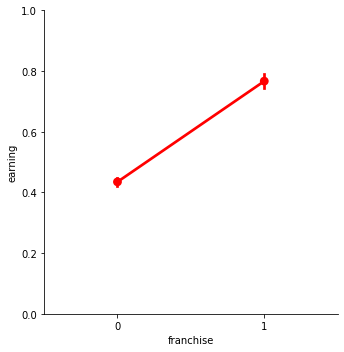

In [45]:
ax = sns.PairGrid(data=clas, x_vars='franchise', y_vars='earning', size=5)
ax.map(sns.pointplot, color='red')
ax.set(ylim=(0, 1))

It looks like a movie belong to a collection has more probability to succeed.

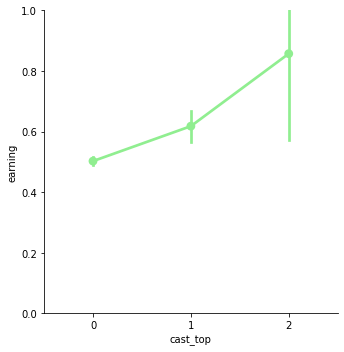

In [47]:
ax = sns.PairGrid(data=clas, x_vars='cast_top', y_vars='earning', size=5)
ax.map(sns.pointplot, color='lightgreen')
ax.set(ylim=(0, 1))

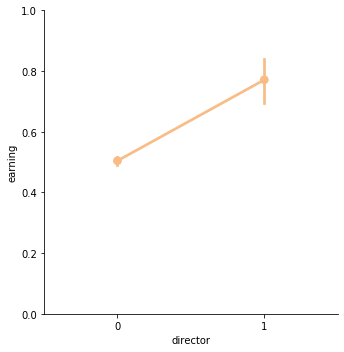

In [48]:
ax = sns.PairGrid(data=clas, x_vars='director', y_vars='earning', size=5)
ax.map(sns.pointplot, color='#f9bc86')
ax.set(ylim=(0, 1))

In [82]:
clas.columns

Index(['franchise', 'Director', 'actors', 'cast_size', 'genre',
       'original_language', 'countries_num', 'companies', 'vote_average',
       'vote_count', 'runtime', 'adjusted_budget', 'adjusted_revenue', 'year',
       'month', 'cast_top', 'ph_top', 'earning', 'director', 'is_english'],
      dtype='object')

Movies with top actors and directors also have more probability to succeed. Next lets build the  classifier. I use XGBClassifier this time.

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier

clas = pd.get_dummies(clas,columns=['genre'], prefix_sep='_is')
clas = clas.drop(['actors','Director','original_language','companies','adjusted_revenue'],axis=1)
clas.columns

Index(['franchise', 'cast_size', 'countries_num', 'vote_average', 'runtime',
       'adjusted_budget', 'year', 'month', 'cast_top', 'ph_top', 'earning',
       'director', 'is_english', 'genre_isAction', 'genre_isAdventure',
       'genre_isAnimation', 'genre_isComedy', 'genre_isCrime',
       'genre_isDocumentary', 'genre_isDrama', 'genre_isFamily',
       'genre_isFantasy', 'genre_isForeign', 'genre_isHistory',
       'genre_isHorror', 'genre_isMusic', 'genre_isMystery', 'genre_isRomance',
       'genre_isScience Fiction', 'genre_isTV Movie', 'genre_isThriller',
       'genre_isWar', 'genre_isWestern'],
      dtype='object')

In [99]:
X,y = clas.drop(['earning'],axis=1).values, clas['earning'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y, shuffle=True, random_state=21)

In [130]:
xgb = XGBClassifier()
cross_val_score(xgb,X_train,y_train,cv=5)

array([0.70062112, 0.71144279, 0.69278607, 0.69154229, 0.67496887])

In [131]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

cross-val score looks balance for 5 fold data

In [132]:
xgb.score(X_test,y_test)

0.6925373134328359

In [88]:
clas.columns

Index(['franchise', 'cast_size', 'countries_num', 'vote_average', 'vote_count',
       'runtime', 'adjusted_budget', 'year', 'month', 'cast_top', 'ph_top',
       'earning', 'director', 'is_english', 'genre_isAction',
       'genre_isAdventure', 'genre_isAnimation', 'genre_isComedy',
       'genre_isCrime', 'genre_isDocumentary', 'genre_isDrama',
       'genre_isFamily', 'genre_isFantasy', 'genre_isForeign',
       'genre_isHistory', 'genre_isHorror', 'genre_isMusic', 'genre_isMystery',
       'genre_isRomance', 'genre_isScience Fiction', 'genre_isTV Movie',
       'genre_isThriller', 'genre_isWar', 'genre_isWestern'],
      dtype='object')

Lets use our model to predict the probability if a movie gonna be a hit or flop

In [103]:
title = 'Avengers: End Game'
film = [[1,31,1,8.4,181,357,2019,4,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
prob = xgb.predict_proba(film)[:,1]
print(title+' has {} probability to be a hit movie!!'.format(prob[0]))

Avengers: End Game has 0.9645093679428101 probability to be a hit movie!!


In [112]:
title = 'The Adventures of Pluto Nash '
film = [[0,15,1,3.8,95,100,2002,8,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
prob = xgb.predict_proba(film)[:,1]
print(title+' has {} probability to be a hit movie!!'.format(prob[0]))

The Adventures of Pluto Nash  has 0.36363622546195984 probability to be a hit movie!!


Well if you know that Avengers: End Game now has been rank #1 for highest gross after Avatar, but Pluto Nash is one of box office disaster with only $7 million of revenue, which is 0.07% percent of the budget.

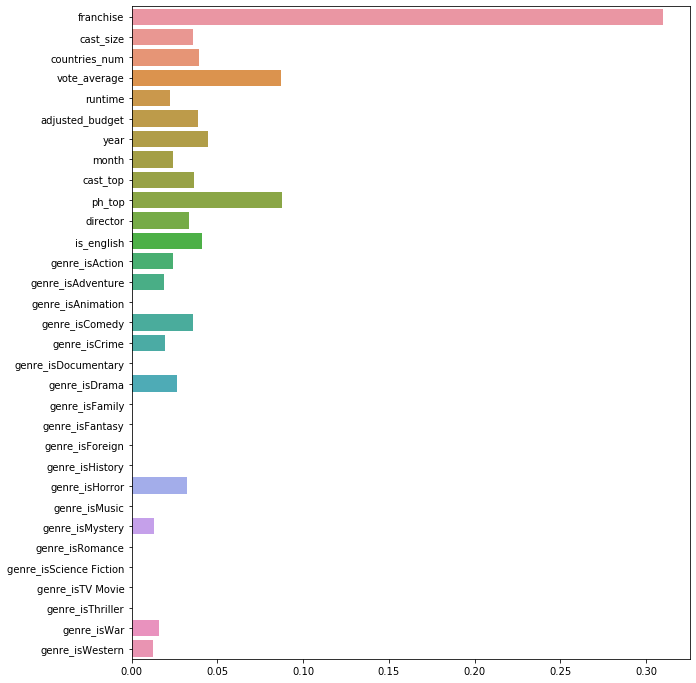

In [105]:
clas = clas.drop(columns='earning')
plt.figure(figsize=(10,12))
sns.barplot(x=xgb.feature_importances_, y=clas.columns)

It seems that belong to franchise, vote_average and production company is the important features of this classifier.